## 灰色关联分析法

对于两个系统之间的因素，其随时间或不同对象而变化的关联性大小的量度，称为关联度。在系统发展过程中，若两个因素变化的趋势具有一致性，即同步变化程度较高，即可谓二者关联程度较高；反之，则较低。因此，灰色关联分析方法，是根据因素之间发展趋势的相似或相异程度，亦即“灰色关联度”，作为衡量因素间关联程度的一种方法。

### 简介
灰色系统理论提出了对各子系统进行灰色关联度分析的概念，意图透过一定的方法，去寻求系统中各子系统（或因素）之间的数值关系。因此，灰色关联度分析对于一个系统发展变化态势提供了量化的度量，非常适合动态历程分析。
###  计算步骤
1. 确实参考数列与比较数列
2. 对参考数列与比较数列进行无量纲化处理
3. 计算关联系数,求关联度

此处我给出的是第三步的实现方式,无量纲化请自己处理.

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# 从硬盘读取数据进入内存
wine = pd.read_csv("/home/fonttian/Data/dataset/wine/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
def GRA_ONE(gray, m=0):
    
    gray_min = gray.min()
    # 读取为df格式
    gray = (gray - gray_min) / (gray.max() - gray_min)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    ce = gray.iloc[:, 0:]  # 为比较要素
    n, m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([m, n])
    for i in range(m):
        for j in range(n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([m, n])
    for i in range(m):
        for j in range(n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    return pd.DataFrame([mean(result[i, :]) for i in range(m)])


def GRA(DataFrame):
    list_columns = [
        str(s) for s in range(len(DataFrame.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    for i in range(len(DataFrame.columns)):
        df_local.iloc[:, i] = GRA_ONE(DataFrame, m=i)[0]
    return df_local

In [16]:
data_wine_gra = GRA(wine)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_wine_gra

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.769306,0.812387,0.701253,0.724887,0.742105,0.725527,0.748950,0.715603,0.773843,0.747421,0.710177
1,0.763586,1.000000,0.697659,0.745058,0.766992,0.773070,0.767780,0.697094,0.744125,0.785006,0.743394,0.681713
2,0.807275,0.697659,1.000000,0.738369,0.751371,0.740039,0.752953,0.687499,0.683898,0.775368,0.738423,0.669089
3,0.698302,0.748637,0.741871,1.000000,0.906416,0.807615,0.858757,0.568263,0.607333,0.828459,0.710262,0.561595
4,0.718607,0.767264,0.751648,0.904999,1.000000,0.813098,0.858236,0.576566,0.614320,0.862755,0.726033,0.568922
5,0.740846,0.777570,0.744831,0.808676,0.816643,1.000000,0.855518,0.639219,0.679397,0.815513,0.738493,0.631487
6,0.721009,0.769497,0.754659,0.857666,0.859213,0.853501,1.000000,0.592666,0.634509,0.816938,0.706328,0.594546
7,0.752257,0.707521,0.698054,0.576341,0.589057,0.644768,0.602719,1.000000,0.779693,0.644097,0.655279,0.761269
8,0.708985,0.744125,0.683898,0.602613,0.613942,0.673674,0.632211,0.771187,1.000000,0.666292,0.723045,0.771055
9,0.768129,0.785006,0.775368,0.825769,0.862575,0.811626,0.815475,0.632208,0.666292,1.000000,0.770830,0.613749


In [22]:
data_wine_gra.columns =['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
data_wine_gra.index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

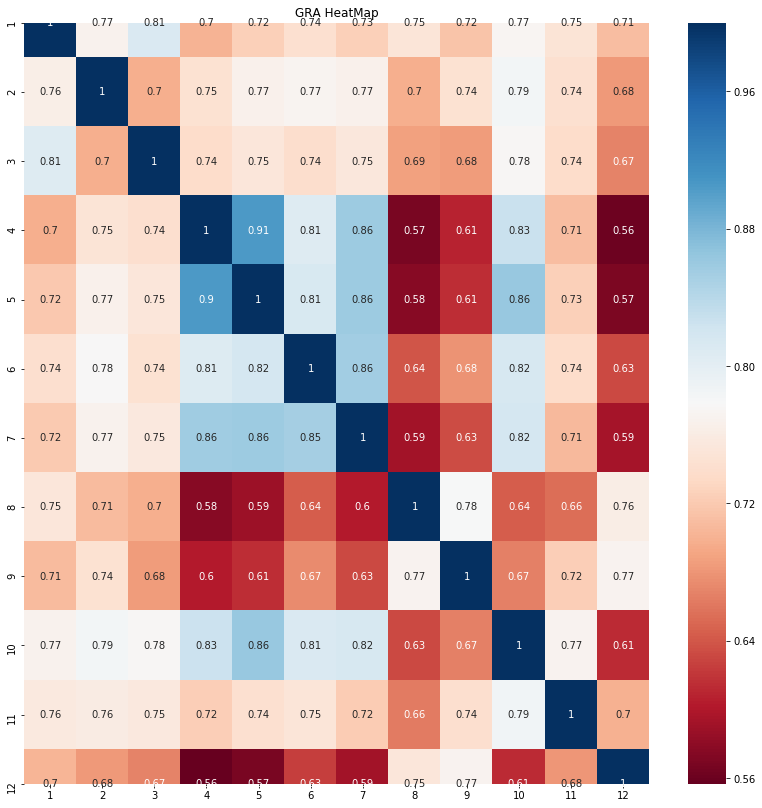

In [34]:
# 灰色关联结果矩阵可视化
import seaborn as sns


def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    sns.heatmap(DataFrame.astype(float),
                cmap=colormap,
                ax=ax,
                annot=True,
                yticklabels=ylabels,
                xticklabels=ylabels)
    plt.show()


ShowGRAHeatMap(data_wine_gra)

## 参考文章
1. [百度百科 灰色关联分析法](https://baike.baidu.com/item/%E7%81%B0%E8%89%B2%E5%85%B3%E8%81%94%E5%88%86%E6%9E%90%E6%B3%95/8602076?fr=aladdin)
2. [简书 Python实现灰色关联](https://www.jianshu.com/p/7f9325551348)